In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from textwrap import indent

from IPython.display import Javascript

from liblet import ANTLR, AnnotatedTreeWalker, Tree, pyast2tree, side_by_side

from operator import add, mul, truediv, sub

from operator import itemgetter

from IPython.display import Latex

from fractions import Fraction

import importlib

from core.arithmetic_manager import ArithManager

from core.util import *

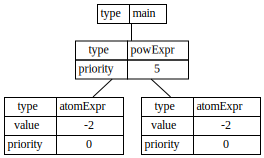

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [33]:
ex1 = '1 + {2 x [(3 + 4 : 2) + 5] x 6} - [ 7 + (1 + 8) : 3 ] x [ 9 : (2 + 1) + 2 ]'
ex2 = '< 2 + 3 > / 4 / < 5 + 6 > / 7'
ex3 = '2 ^ < 3 + 4 ^ 5 : 2 ^ 7 >'
ex4 = '3 + 13 x -<1 + 3>/<2^<1+4> - 6>'
ex5a = '3 / < 4 + 2 > + 2 x { 3 : ( 4 + 5 ) + 2 ^ < 6 x 1/2 > } - < 2 x [ 5 x ( 3 + 4 ) + 5 ] - 1 > / 6'
ex5b = '3 / < 4 + 2 > + 2 x ( 3 : ( 4 + 5 ) + 2 ^ < 6 x 1/2 > ) - < 2 x ( 5 x ( 3 + 4 ) + 5 ) - 1 > / 6'

src = '(2^-1/3 + 0.5 + 8 - 2.3 x 2.1 - 2 + (((2 + 3) + 1) - 1) + (2 + (2 - 2 x (8 + 9 - (5 x 6))))):0'
expr = '- 2 ^ - 2'


src = expr


AM = ArithManager()
ast = AM.ptree2ast(AM.ptree('antlrGrammar.g', src))
blocks = AM.blocks(ast)
MEMORY = dict(blocks)

display(ast)

main_block = blocks[-1][1]
child_to_calc = None

current_block = block_id = None

while blocks and is_calculable(blocks[0][1]): blocks = blocks[1:]
    
while blocks:
    block_id, current_block = blocks[0]
        
    parent_to_calc = AM.prior(current_block)
    display_latex(AM.latex(main_block, MEMORY))

    parent_to_calc.children =  [Tree({'type': 'atomExpr', 'value': AM.eval(child, MEMORY), 'priority': 0, '_calc': 'last'}, []) 
                                if is_next_to_calc(child) else child
                                for child in parent_to_calc.children]
    
    if is_calculable(current_block):
        current_block = current_block.children[0]
        blocks = blocks[1:]
        
    MEMORY[block_id] = current_block

display_latex(AM.latex(main_block, {}))

In [8]:
from core.shunting_yard_parser import ShuntingYardParser
from core.arithmetic_manager import ArithManager
from core.util import *

In [9]:
def ast_eval(ast, show_latex, show_ast):
    AM = ArithManager()
    
    if show_ast: display(ast)
        
    blocks = AM.blocks(ast)
    MEMORY = dict(blocks)
    main_block = blocks[-1][1]
    child_to_calc = None
    current_block = block_id = None

    while blocks and is_calculable(blocks[0][1]): blocks = blocks[1:]

    while blocks:
        block_id, current_block = blocks[0]
        parent_to_calc = AM.prior(current_block)
        tex = AM.latex(main_block, MEMORY)
        if show_latex: display_latex(tex)
        
        parent_to_calc.children =  [Tree({'type': 'atomExpr', 'value': AM.eval(child, MEMORY), 'priority': 0, '_calc': 'last'}, []) 
                                    if is_next_to_calc(child) else child
                                    for child in parent_to_calc.children]

        if is_calculable(current_block):
            current_block = current_block.children[0]
            blocks = blocks[1:]

        MEMORY[block_id] = current_block

    tex = AM.latex(main_block, {})
    if show_latex: display_latex(tex)
    
    return main_block.children[0].root['value']


def antlr_eval(expr, show_latex=False, show_ast = False):
    AM = ArithManager()
    ast = AM.ptree2ast(AM.ptree('antlrGrammar.g',expr))
    return ast_eval(ast, show_latex, show_ast)


def shunting_eval(expr, show_latex=False, show_ast = False):
    shunting_yard_parser = ShuntingYardParser()

    ast = shunting_yard_parser.parse(expr)
    return ast_eval(ast, show_latex, show_ast)


In [10]:
print(expr)


2 ^ - 1/2


In [34]:
from core.expression_generator import generate_expression

wrong_expr = []
for _ in range(50):
    try:
        expr = generate_expression(1)
        #print(expr)
        antlr_res = antlr_eval(expr)
        shunting_res = shunting_eval(expr)
    except:
        print("** EXCEPTION **", expr)
        wrong_expr.append(expr)
        break
    if antlr_res != shunting_res:
        wrong_expr.append(expr)
        
if wrong_expr != []:
    print("WRONG: ", wrong_expr)
else:
    print("ALL DONE")

ALL DONE


In [12]:
generate_expression(2)

'( ( 71 : ( 39 ) ) / 44 : 48 ^ 2 - 67 ^ 2 ^ 2 - - - - 11 - - 29 / - 77 : 73 ^ 2 / 39 + ( 55 : 21 ) / 74 + - 7 ^ 2 + 54 x 52 + 17 )'

In [30]:
expr = '- 18 : - - 72 ^ 2'
antlr_res = antlr_eval(expr)

shunting_res = shunting_eval(expr)
antlr_res, shunting_res



(0.003472222222222222, 0.003472222222222222)